In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
from src.experiments.training.training import init_training_job, get_dev_data, get_full_data, start_training, plot_loss
from src.models.Transformer import TransformerEncoder, TransformerEncoderHyperParams
from src.experiments.training.Transformer.TransformerEncoder_training import TransformerEncoderJob, TransformerEncoderJobParams
from src.models.model_run_job import ModelJob, ModelJobParams
%matplotlib inline

# Init

In [3]:
folder_name = 'decreased_learning_rate'
model_name = "Transformer Encoder"
description = 'Decreased the learning rate and changed from adam to adamw optimizer. Also changed the weight initialization'
is_dev=False

# Full Data

In [ ]:
init_training_job(is_dev,folder_name, model_name, description)

In [ ]:
hyper_params = TransformerEncoderHyperParams()
job_params = TransformerEncoderJobParams(is_dev)

In [ ]:
full_data = get_full_data()

In [ ]:
training_loss, valid_loss = start_training(
    data=full_data,
    version=0.2,
    num_epochs=20,
    job=TransformerEncoderJob,
    job_params=job_params,
    model_class=TransformerEncoder,
    model_hyper_params=hyper_params
)

In [ ]:
plot_loss(training_loss, valid_loss, folder_name, is_dev)

# Dev Data

In [13]:
is_dev=True
init_training_job(is_dev,folder_name, model_name, description)

2020-11-08 16:45:39 - Starting training job for model Transformer Encoder
2020-11-08 16:45:39 - Decreased the learning rate and changed from adam to adamw optimizer. Also changed the weight initialization


In [14]:
hyper_params = TransformerEncoderHyperParams()
job_params = TransformerEncoderJobParams(is_dev)

2020-11-08 16:45:39 - Transformer Encoder Hyper Params
2020-11-08 16:45:39 - {
    "input_size": 78,
    "output_size": 11,
    "num_head": 6,
    "hidden_size": 128,
    "num_layers": 5,
    "dropout": 0.1
}
2020-11-08 16:45:39 - Transformer Encoder Job params
2020-11-08 16:45:39 - {
    "qpm_index": true,
    "vel_param_idx": 0,
    "dev_param_idx": 2,
    "articul_param_idx": 3,
    "pedal_param_idx": 4,
    "time_steps": 500,
    "num_key_augmentation": 1,
    "batch_size": 1,
    "num_tempo_param": 1,
    "num_input": 78,
    "num_output": 11,
    "num_prime_param": 11,
    "device_num": 1,
    "is_dev": false,
    "learning_rate": 3e-05,
    "grad_clip": 0.5,
    "model_name": "TRANSFORMER ENCODER ONLY"
}


In [15]:
dev_data = get_dev_data()

2020-11-08 16:45:41 - Reading Dev Data
2020-11-08 16:45:41 - Loading the training data
2020-11-08 16:45:46 - number of train performances: 5 number of valid perf: 3
2020-11-08 16:45:46 - training sample example: [0.40253450874098085, -0.9043350534864922, 2.272152234854334, 1.6245242470007877, 1.2609703359796316, -0.13802735400033747, -0.8957452833471335, -0.8172526447037678, 0.0, 0.0, -1, 0, 0, 0.25, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0.4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]


In [17]:
training_loss, valid_loss = start_training(
    data=dev_data,
    version=0.2,
    num_epochs=20,
    job=TransformerEncoderJob,
    job_params=job_params,
    model_class=TransformerEncoder,
    model_hyper_params=hyper_params
)

2020-11-08 16:45:59 - STARTING None TRAINING VERSION 0.2 JOB AT 20 EPOCHS FOR  DATA SET
2020-11-08 16:45:59 - Number of model params: 226539
2020-11-08 16:45:59 - TransformerEncoder(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=78, out_features=78, bias=True)
        )
        (linear1): Linear(in_features=78, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=128, out_features=78, bias=True)
        (norm1): LayerNorm((78,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((78,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_at

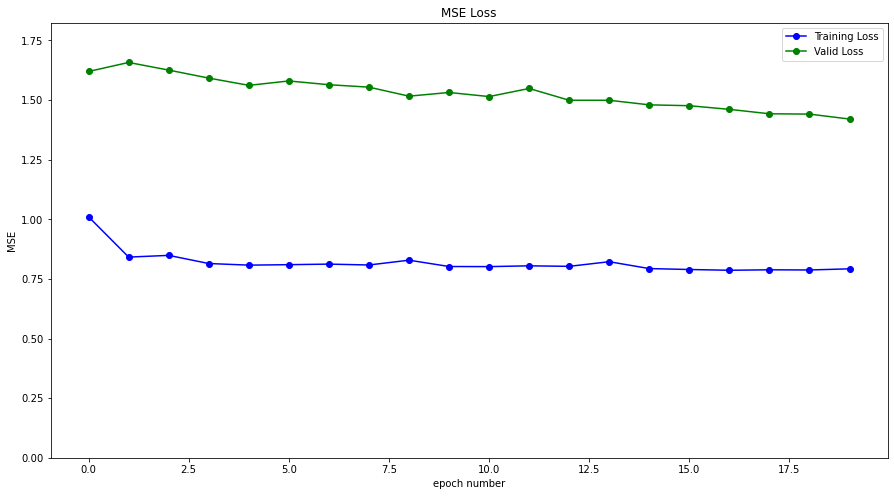

In [33]:
plot_loss(training_loss, valid_loss, folder_name, is_dev)